# CALIFORNIA HOUSING DATASET

In [1]:
# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# EDA

In [3]:
#Load the dataset into a pandas dataframe
df = pd.read_csv('D:/DML PROJECT DATASET/HouseDataset/housing.csv')

In [4]:
# checking number of rows and column
df.shape

(20640, 10)

In [5]:
#listing the first 5 rows of dataset
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [6]:
#checking the datatype and number of non null value in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
# checking if the number of non-null value in the dataset are same
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
# calculating the basics stats
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
# seperating (object or boolean) and (int or float value)
qulitative_cols = []
quantitative_cols = []
for x in df.columns:
    if df[x].dtype =='object' or df[x].dtype=='bool':
        qulitative_cols.append(x)
    elif df[x].dtype =='int64' or df[x].dtype=='float64':
        quantitative_cols.append(x)
print(qulitative_cols)
print(quantitative_cols)

['ocean_proximity']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [10]:
# ocean_proximity has a catogerical features 
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Data Exploration

In [11]:
# checking the number of null value in total_bedrooms
df['total_bedrooms'].isnull().sum()

207

# There are some null data in total_bedrooms column, the rows were 20640 that now stands at 20433. since the loss here is 207, we can subtract the null values  from our data. there will not be much loss in our data.

In [12]:
# droping null value from rows
df.dropna(inplace=True)

In [13]:
# Encode categorical variables
pd.get_dummies(df["ocean_proximity"])

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20433 rows x 5 columns]

In [14]:
# storing the dummies value of ocean_proximity in another variable 
data = df.join(pd.get_dummies(df["ocean_proximity"])).drop(["ocean_proximity"],axis=1).copy()

In [15]:
# print data
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
0             322         126         8.3252              452600          0   
1            2401        1138         8.3014              358500          0   
2             496         177         7.2574              352100          0   
3             558         219         5.6431              341300          0   
4             565         259         3.8462              342200          0   
...           ...         ...            ...                 ...        ...   
20635         845         330         1.5603               78100          0   
20636         356         114         2.5568               77100          0   
20637        1007         433         1.7000               92300          0   
20638         741         349         1.8672               84700          0   
20639        1387         530         2.3886               89400          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0           0       0         1           0  
1           0       0         1           0  
2           0       0         1           0  
3           0       0         1           0  
4           0       0         1           0  
...       ...     ...       ...         ...  
20635       1       0         0           0  
20636       1       0         0           0  
20637       1       0         0           0  
20638       1       0         0           0  
20639       1       0         0           0  

[20433 rows x 14 columns]

# Data Visualization

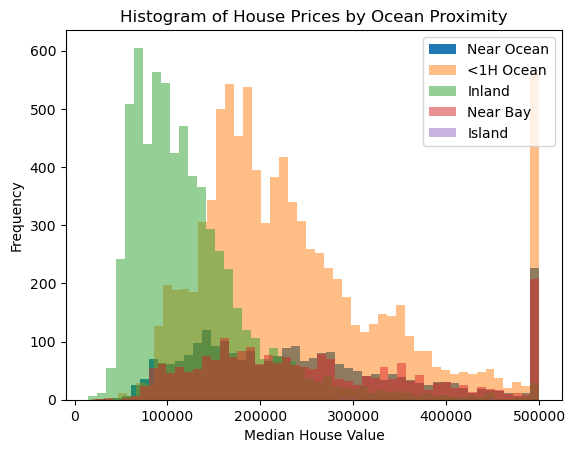

In [16]:
# Create a histogram of house prices with ocean proximity
plt.hist(df[df["ocean_proximity"] == "NEAR OCEAN"]["median_house_value"], bins=50, label="Near Ocean")
plt.hist(df[df["ocean_proximity"] == "<1H OCEAN"]["median_house_value"], bins=50, alpha=0.5, label="<1H Ocean")
plt.hist(df[df["ocean_proximity"] == "INLAND"]["median_house_value"], bins=50, alpha=0.5, label="Inland")
plt.hist(df[df["ocean_proximity"] == "NEAR BAY"]["median_house_value"], bins=50, alpha=0.5, label="Near Bay")
plt.hist(df[df["ocean_proximity"] == "ISLAND"]["median_house_value"], bins=50, alpha=0.5, label="Island")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices by Ocean Proximity")
plt.legend()
plt.show()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

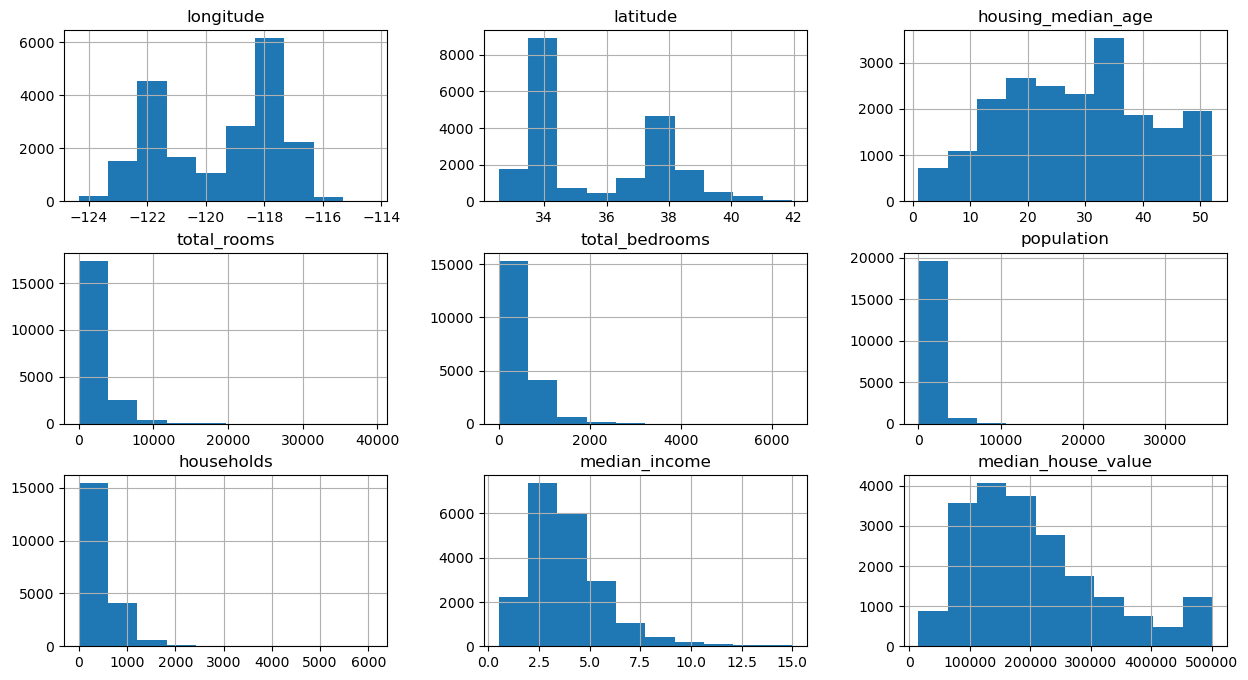

In [17]:
df.hist(figsize = (15,8))

# The histogram  is bit complex to understand so let's divide input into 50 intervals

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

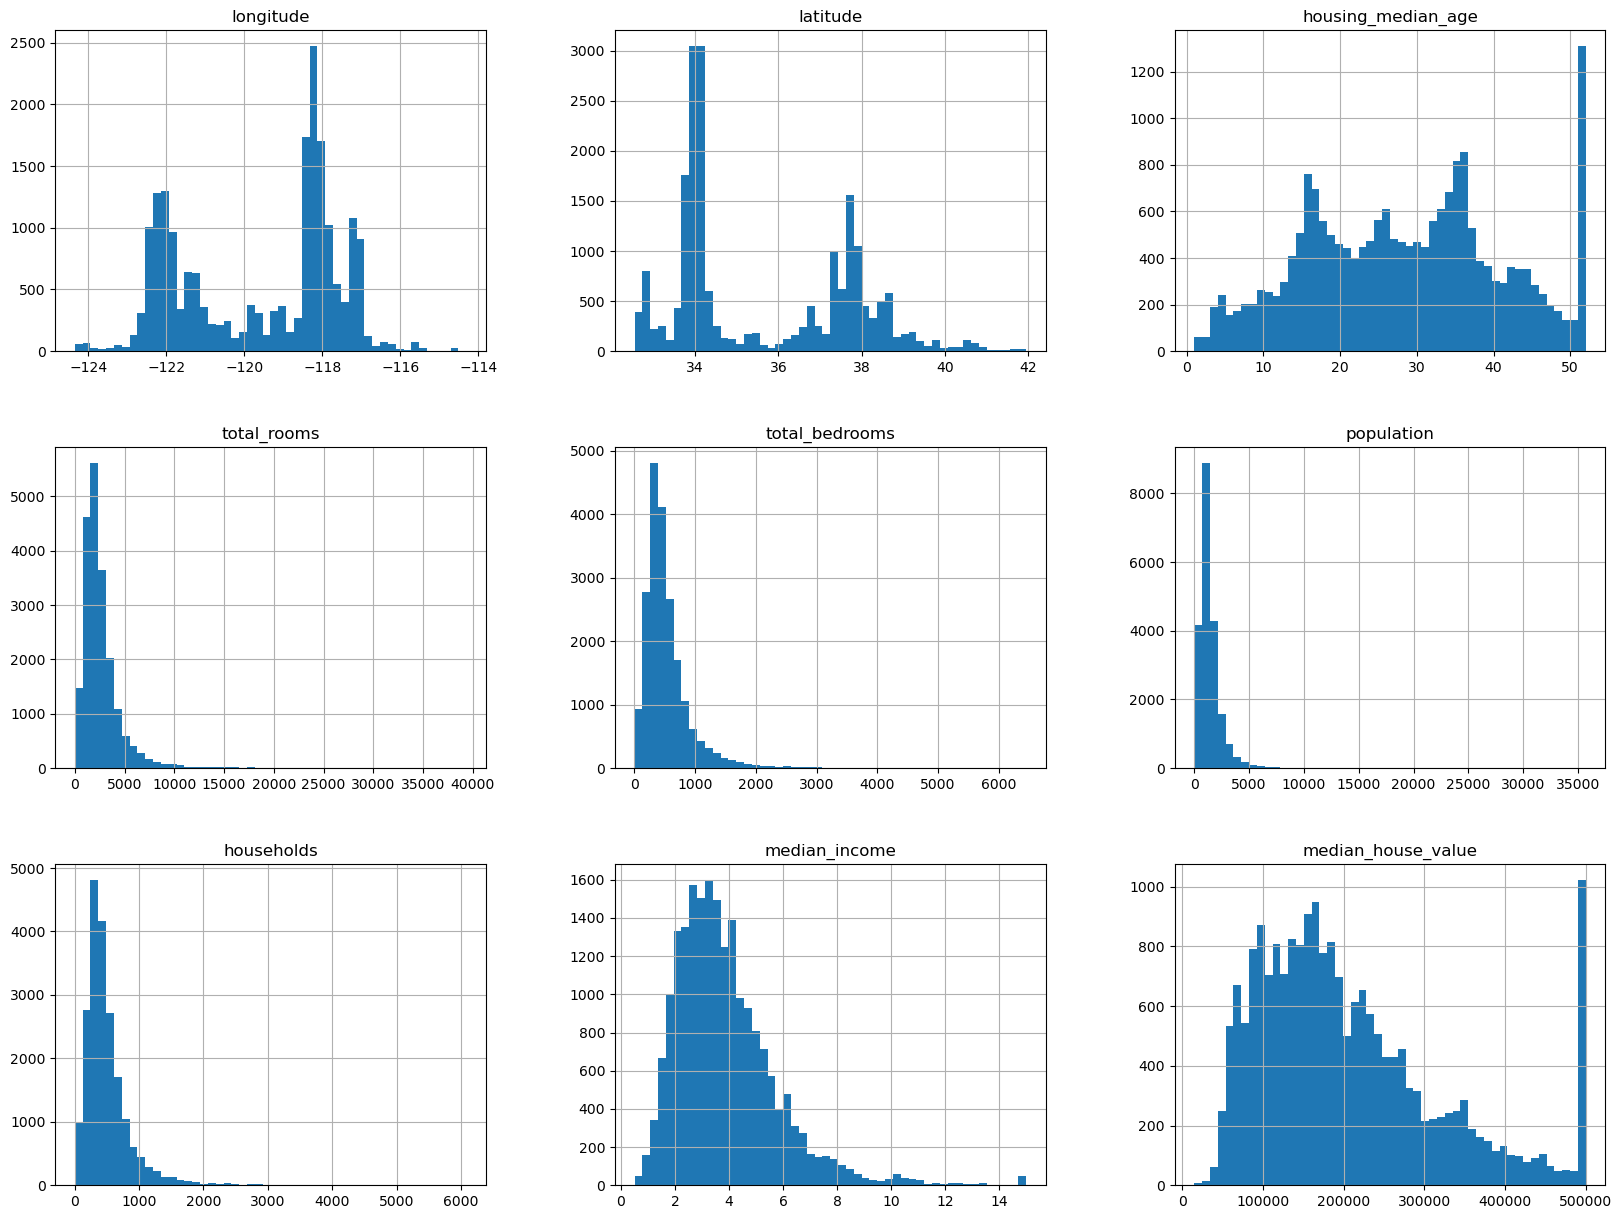

In [18]:
df.hist(bins=50,figsize=(20,15))

# Note that there are some outliers in the median house value. 
# and they are capped at 500,000. Hence, any home that costs more than 
# 500,000 marked as one category

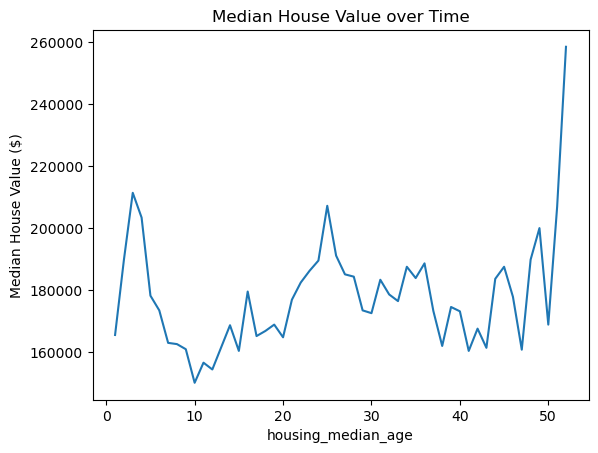

In [19]:
# Extract the 'year' and 'median_house_value' columns from the DataFrame and group by year
house_values_by_year = df[['housing_median_age', 'median_house_value']].groupby('housing_median_age').median()

# Create a line chart with year on the x-axis and median house value on the y-axis
plt.plot(house_values_by_year.index, house_values_by_year['median_house_value'])
plt.title('Median House Value over Time')
plt.xlabel('housing_median_age')
plt.ylabel('Median House Value ($)')
plt.show()

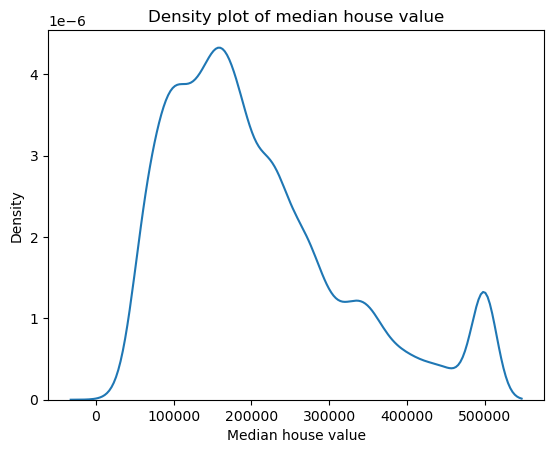

In [20]:
# Create a density plot for the 'median_house_value' variable
sns.kdeplot(data=df, x='median_house_value')

# Set plot title and axis labels
plt.title('Density plot of median house value')
plt.xlabel('Median house value')
plt.ylabel('Density')

# Display the plot
plt.show()

# With the time the density keeps on decreasing respect to median house value

In [21]:
# calculate the correlation coefficients between the columns
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

<AxesSubplot:>

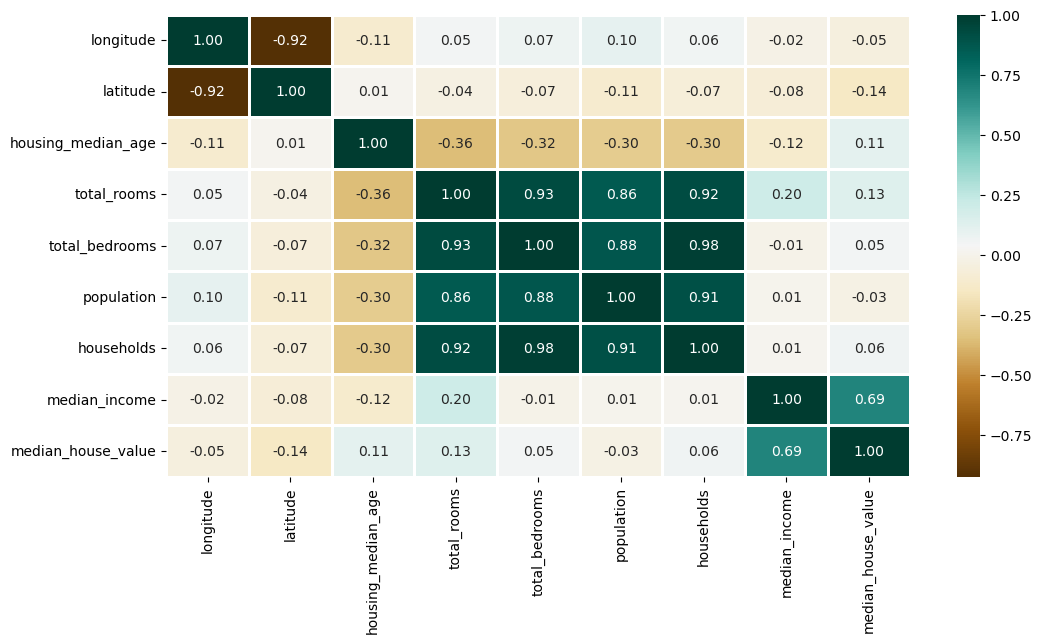

In [22]:
# plotting a heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)



# The column total_bedrooms, total_rooms, population, households, longitude shows a Positive relation.
# Target Variable is Median_house_Value

# Selecting Features and Engineering
# Selecting Model

In [23]:

# Select the features and target variable for the model
X = df[['total_bedrooms', 'households', 'longitude', 'total_rooms', 'population']]
y = df['median_house_value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Linear Regression is :', r2)
print('Mean squared error for Linear Regression is :', mse)
print('Root mean squared error for Linear Regression is :', rmse)

R^2 score for Linear Regression is : 0.13908223737270387
Mean squared error for Linear Regression is : 11773206045.848831
Root mean squared error for Linear Regression is : 108504.40565179291


# The column total_bedrooms, total_rooms, population, households, longitude shows a Positive relation but got really low score.
# The target variable is median_house_value .So let's try with dropping median_house_value from our data and assigning it to another variable.

In [24]:

X=data.drop(['median_house_value'], axis='columns')
X.head()
y=data['median_house_value']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [26]:
# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for linear regression:', r2)
print('Mean squared error for linear regression:', mse)
print('Root mean squared error for linear regression:', rmse)

R^2 score for linear regression: 0.6488402154431994
Mean squared error for linear regression: 4802173538.604158
Root mean squared error for linear regression: 69297.71669113029


# Random Forest Regression

In [28]:
# Train a Random Forest regression model on the training set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

In [30]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Random Forest Regression is :', r2)
print('Mean squared error for Random Forest Regression is :', mse)
print('Root mean squared erro for Random Forest Regression is :', rmse)

R^2 score for Random Forest Regression is : 0.8262504702161796
Mean squared error for Random Forest Regression is : 2376056231.2846966
Root mean squared erro for Random Forest Regression is : 48744.80722379253


# Lasso Regression

In [31]:
# Train a Lasso regression model on the training set
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.268e+12, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [32]:
# Make predictions on the testing set
y_pred = lasso.predict(X_test)



In [33]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for lasso regression:', r2)
print('Mean squared error for lasso regression:', mse)
print('Root mean squared error for lasso regression:', rmse)

R^2 score for lasso regression: 0.6488686329140887
Mean squared error for lasso regression: 4801784924.552265
Root mean squared error for lasso regression: 69294.91268882778


 # Decision Tree Regression


In [34]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)



DecisionTreeRegressor()

In [35]:
# Make predictions on the testing set
y_pred = dt.predict(X_test)



In [36]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Decision tree Regression is:', r2)
print('Mean squared error for Decision Tree Regression is:', mse)
print('Root mean squared error fro Decision Tree Regression is:', rmse)

R^2 score for Decision tree Regression is: 0.6586500402880272
Mean squared error for Decision Tree Regression is: 4668022410.371666
Root mean squared error fro Decision Tree Regression is: 68322.9274136557


# SVR

In [37]:
svr = SVR()

In [38]:
svr.fit(X_train, y_train)

SVR()

In [39]:
# Make predictions on the testing set
y_pred = svr.predict(X_test)

In [40]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for SVR is:', r2)
print('Mean squared error for SVR is:', mse)
print('Root mean squared error for SVR is:', rmse)

R^2 score for SVR is: -0.05464780893333754
Mean squared error for SVR is: 14422499452.773531
Root mean squared error for SVR is: 120093.71112915751


# using scikit-learns Pipeline module to create a pipeline of transformations and estimators for our data.
# Linear Regression (Pipeline)

In [41]:
# creating tuples and including relevant column
feature = ["total_rooms","total_bedrooms","housing_median_age","median_income"]

In [42]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

In [43]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [45]:
# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

In [46]:
print("The MSE value for Linear Regressor with pipeline module is : " + str(mse))
print("The R^2 score value for Linear Regressor with pipeline module is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Linear Regressor with pipeline module is : " + str(rmse))

The MSE value for Linear Regressor with pipeline module is : 5380462394.375647
The R^2 score value for Linear Regressor with pipeline module is : 0.5962051075600903
The Root mean score value for Linear Regressor with pipeline module is : 73351.63525358959


# Random Forest Regression (Pipeline)

In [47]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', RandomForestRegressor())]

In [48]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', RandomForestRegressor())])

In [49]:
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [50]:
# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

In [51]:
print("The MSE value for Random Forest Regressor with pipeline module is : " + str(mse))
print("The R^2 score value for Random Forest Regressor with pipeline module is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Random Forest Regressor with pipeline module is : " + str(rmse))

The MSE value for Random Forest Regressor with pipeline module is : 728482903.6326777
The R^2 score value for Random Forest Regressor with pipeline module is : 0.9453285509393836
The Root mean score value for Random Forest Regressor with pipeline module is : 26990.4224426495


# SVR (Pipeline)

In [52]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', SVR())]

In [53]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', SVR())])

In [54]:
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [55]:
# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

In [56]:
print("The MSE value for SVR with pipeline module is : " + str(mse))
print("The R^2 score value for SVR with pipeline module is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for SVR with pipeline module is : " + str(rmse))

The MSE value for SVR with pipeline module is : 14023252997.334217
The R^2 score value for SVR with pipeline module is : -0.052422175022616146
The Root mean score value for SVR with pipeline module is : 118419.81674252928


# Ridge Regression (Pipeline)

In [57]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', Ridge(0.5))]

In [58]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=0.5))])

In [59]:
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [60]:
# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

In [61]:
print("The MSE value for Ridge Regressor with pipeline module is : " + str(mse))
print("The R^2 score value for Ridge Regressor with pipeline module is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Ridge Regressor with pipeline module is : " + str(rmse))

The MSE value for Ridge Regressor with pipeline module is : 5380464530.530381
The R^2 score value for Ridge Regressor with pipeline module is : 0.5962049472451754
The Root mean score value for Ridge Regressor with pipeline module is : 73351.64981464548


 # Lasso Regression (Pipeline)

In [62]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', Lasso(alpha=0.5))]

In [63]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)
# Make predictions on the data
predictions = pipe.predict(df[feature])

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.488e+13, tolerance: 2.723e+10
  model = cd_fast.enet_coordinate_descent(


In [64]:
# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# Print the score
print("The MSE value for Lasso Regresion with pipeline module is : " + str(mse))
print("The R^2 score value for Lasso Regression with pipeline module is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Lasso Regression with pipeline module is : " + str(rmse))

The MSE value for Lasso Regresion with pipeline module is : 5386237174.971572
The R^2 score value for Lasso Regression with pipeline module is : 0.5957717197323019
The Root mean score value for Lasso Regression with pipeline module is : 73390.98837712688


# Implementing PCA with pipeline module
# SVR

In [65]:
from sklearn.decomposition import PCA

estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', SVR())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for SVR with PCA is: " + str(mse))
print("The R^2 score value for SVR with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for SVR with PCA is: " + str(rmse))


The MSE value for SVR with PCA is: 14036233073.734196
The R^2 score value for SVR with PCA is: -0.053396308502160705
The Root mean score value for SVR with PCA is: 118474.60940528226


# Lasso Regression with PCA

In [66]:


estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', Lasso(alpha=0.5))]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for lasso Regression with PCA is: " + str(mse))
print("The R^2 score value for lasso Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for lasso Regression with PCA is: " + str(rmse))


The MSE value for lasso Regression with PCA is: 10972872605.444948
The R^2 score value for lasso Regression with PCA is: 0.17650387853205562
The Root mean score value for lasso Regression with PCA is: 104751.4802064627


# Ridge Regression with  PCA

In [67]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', Ridge(0.5))]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for Ridge Regression with PCA is: " + str(mse))
print("The R^2 score value for Ridge Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Ridge Regression with PCA is: " + str(rmse))

The MSE value for Ridge Regression with PCA is: 10972872605.433752
The R^2 score value for Ridge Regression with PCA is: 0.17650387853289584
The Root mean score value for Ridge Regression with PCA is: 104751.48020640927


# Random Forest Regression with  PCA

In [68]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', RandomForestRegressor())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for Random Forest Regression with PCA is: " + str(mse))
print("The R^2 score value for Random Forest Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Random Forest Regression with PCA is: " + str(rmse))

The MSE value for Random Forest Regression with PCA is: 1474464801.9435782
The R^2 score value for Random Forest Regression with PCA is: 0.88934383098196
The Root mean score value for Random Forest Regression with PCA is: 38398.760421966464


# Linear Regression with  PCA

In [69]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', LinearRegression())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for Linear Regression with PCA is: " + str(mse))
print("The R^2 score value for Linear Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Linear Regression with PCA is: " + str(rmse))

The MSE value for Linear Regression with PCA is: 10972872605.408522
The R^2 score value for Linear Regression with PCA is: 0.17650387853478933
The Root mean score value for Linear Regression with PCA is: 104751.48020628883


In [70]:
# importing statsmodel
import statsmodels.api as sm

In [71]:
# Add constant to the feature matrix
X = sm.add_constant(df[feature])

# Fit the OLS model to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     6177.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:03:09   Log-Likelihood:            -2.5907e+05
No. Observations:               20433   AIC:                         5.181e+05
Df Residuals:                   20428   BIC:                         5.182e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.799e+04   2265